<a href="https://colab.research.google.com/github/GreeshmaBodapati/Machine-learning-/blob/main/Introduction_To_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

In [2]:
#Introduction to ML
#used libraies-random,numpy,pandas

In [3]:
#Terms in ML
#1.Collection: data used for traning ,validating and testing the ml model
#2.Feature(x) : independent varaible or input variable -used to predict the target variable
#3.Target(y): Dependent variable-output-we want to predict
#Example:predicting number of bedrooms
#4.Traning Data:subset of dataset used to train the model
#5.Testing data: subset of dataset used to validate the tranied model
#6.Model:mathematical representation of relationship b/w feature and traget
#7.Supervised Learning(sl): Training the model based on label data|| model learns from known/labeled data
#8.Regression: method to predict continues values from a model-supervised learning
#9.Overfitting: when a model learns from training data too well,includes noise-perform poorly new data
#10.Underfitting:  model  is too simpler and does not capture patterns in data

In [4]:
## Categories in machine learning:-
# 1.Supervised learning :
#model learns from labelled data-i/o paries
#example :- linear regression, decision trees,random forest ,svm
#Best use case so far: house price prediction based on previous data/histroical data
#2.Unsupervised learning:
# model finds new patterns in unlabeled data without prefined data/labels
#Example:clustering(kmeans),PCA
#use case: Customer segementation in marketing
#3.Reinforcement learning:
#model learns by interacting witn environment and receving the rewards or penalities
#Example : deep learning,Alphgo,...
#Best use case : self car driving vehicles, self learning ai bots, SLAM
#Example: predicating the house price -random dataset-generated

##steps:-
#1.Generate a random dataset
#2.Evaluate the model
#3.evaluate train a ML-model-linear regression
#4. make predication

In [5]:
import numpy as nd
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
#step 1 : Generate a random dataset
import numpy as np

np.random.seed(42)
# used to set sequence of values for the random package
numSamples = 100

#create numsamples no of samples from(800,5000)
size = np.random.randint(800, 5000, numSamples)

bedrooms = np.random.randint(1, 6, numSamples)
washrooms = np.random.randint(1, 8, numSamples)
localityScore = np.random.randint(1, 10, numSamples)

#Genetrate House price with randomness
houseprice = (size * 3000) +(bedrooms *50000) + (washrooms * 30000) + (localityScore * 70000) + np.random.randint(-50000, 50000, numSamples)

#create a dataframe
df =pd.DataFrame(
    {
        'size':size,
        'bedrooms':bedrooms,
        'washrooms':washrooms,
        'locality Score':localityScore,
        'price':houseprice
     }
    )

In [8]:
df

,size,bedrooms,washrooms,locality Score,price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [7]:
#Step 2: train a ML model_linear regression

#package(installation) requirements :
#pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
x = df[['size','bedrooms','washrooms','locality Score']]
y = df['price']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
#step 3 : Evaluate the Model
#package requirements :
#sklearn.metrices

from sklearn.metrics import mean_absolute_error , mean_squared_error

y_pred = model.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error: {MAE}')
print(f'Mean Squared Error: {MSE}')
print(f'Root Mean Squared Error: {RMSE}')

Mean Absolute Error: 25385.345481365337
Mean Squared Error: 796791448.4323988
Root Mean Squared Error: 28227.494547557686


In [12]:
# Step 4 : Make predicition
newHouse = np.array([[500,1,1,1]])
predictedPrice = model.predict(newHouse)
print(f'The predicted prize of new house is{predictedPrice[0]}')

The predicted prize of new house is1669544.1931444053


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
predictedPrice[0]

1669544.1931444053

In [14]:
print(f'The predicted prize of new house is{predictedPrice[0]}')

The predicted prize of new house is1669544.1931444053


<ipython-input-15-210e1d47767d>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


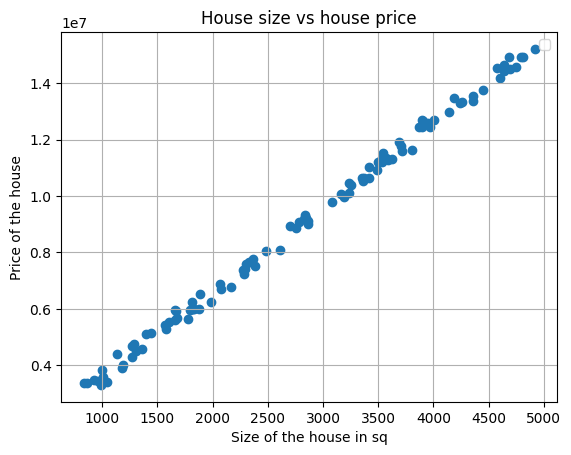

In [15]:
plt.scatter(df['size'],df['price'])
#plt.plot(df['size'],y_pred,color='red', linewidth = 2)
plt.xlabel('Size of the house in sq')
plt.ylabel('Price of the house')
plt.legend()
plt.grid(True )
plt.title('House size vs house price')
plt.show()

In [16]:
xSorted = np.sort(x_test,axis=0)
ypred = model.predict(xSorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-17-948697590ed7>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


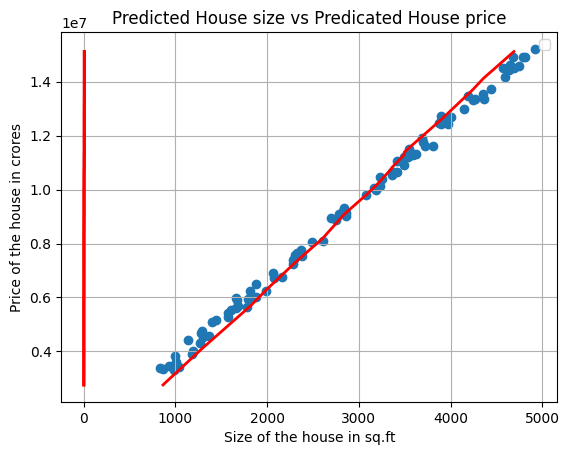

In [17]:
plt.scatter(df['size'],df['price'])
plt.plot(xSorted,ypred,color='red', linewidth = 2)
plt.xlabel('Size of the house in sq.ft')
plt.ylabel('Price of the house in crores')
plt.legend()
plt.grid(True )
plt.title('Predicted House size vs Predicated House price')
plt.show()